In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np; np.set_printoptions(linewidth=110);
import pandas as pd
pd.set_option("display.max_columns", None)

import os
import sys
sys.path.append('D:/point_process_coupling_public/Code/')
project_dir = 'D:/point_process_coupling_public/'

import matplotlib.pyplot as plt
import random
import scipy
import scipy.io as sio
from scipy.ndimage.filters import gaussian_filter
import seaborn
from tqdm import tqdm
from tqdm.notebook import trange
import time

import util
import hierarchical_model_generator
import jitter


# Simple Example.

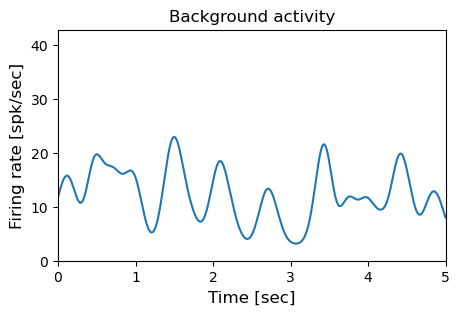

In [2]:
generator = hierarchical_model_generator.HierarchicalModelGenerator()
trial_length = 5
trial_window = [0, trial_length]
generator_par = {'num_trials': 1, 'trial_length': trial_length, 'trial_window': trial_window,
    'rho': 10, 'mu': 10, 'baseline': 3, 'window': 'gaussian', 'sigma': 0.1, 'random_seed': 1,
    'type': 'square', 'alpha': [[0., -5], [0.0, 0.0]], 'beta': [[1.0, 0.05], [1.0, 1.0]], 'num_nodes': 2}
_ = generator.generate_amarasingham_coupling_filter_spike_times_nonrepeated(generator_par, file_path=None, verbose=3)


In [3]:
generator = hierarchical_model_generator.HierarchicalModelGenerator()
trial_length = 5
trial_window = [0, trial_length]
generator_par = {'num_trials': 40, 'trial_length': trial_length, 'trial_window': trial_window,
    'rho': 12, 'mu': 12, 'baseline': 1, 'window': 'gaussian', 'sigma': 0.04, 'random_seed': 1,
    'type': 'square', 'alpha': [[0., -5], [0.0, 0.0]], 'beta': [[1.0, 0.05], [1.0, 1.0]], 'num_nodes': 2}
spike_times = generator.generate_amarasingham_coupling_filter_spike_times_nonrepeated(generator_par, verbose=2)
spike_times_x = spike_times[1]
spike_times_y = spike_times[0]

100%|███████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 13.81it/s]


### Conditional inference

100%|████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 170.65it/s]
Save figure to: D:/point_process_coupling_public/Output/fig/eg_amarasingham_square_filter_weak_ccg_spk2ms_jitterwindow120ms.pdf


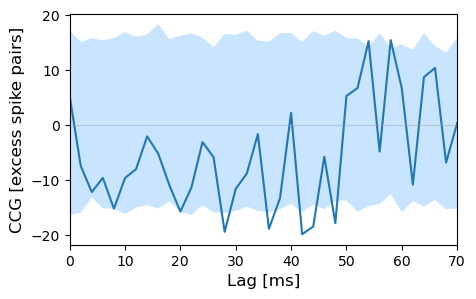

In [4]:
jittertool = jitter.JitterTool()
spk_bin_width = 0.002
lag_range = [-0.00, 0.07]
jitter_window_width = 0.12
distribution_type='mc_sim'
num_jitter = 300
file_path = project_dir + 'Output/fig/eg_amarasingham_square_filter_weak_ccg_spk2ms_jitterwindow120ms.pdf'
ret_vals = jittertool.cross_correlation_jitter(spike_times_x, spike_times_y, spk_bin_width, trial_length, lag_range, jitter_window_width,
    distribution_type=distribution_type, num_jitter=num_jitter, ci_alpha=0.05, verbose=1, file_path=file_path)

### Standard Hawkes

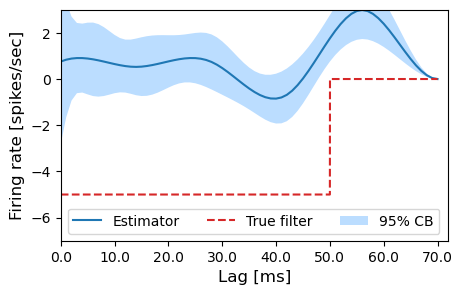

In [5]:
jittertool = jitter.JitterTool()
model_par = {'filter_type': 'bspline', 'num_knots': 6, 'knot_space_par': 20, 'filter_length': 0.07, 'num_tail_drop': 2,
             'append_nuisance': ['const'],
             'const_offset': 0, 'learning_rate': 0.5, 'max_num_itrs': 100, 'epsilon': 1e-6}
model_par_hat = jittertool.bivariate_continuous_time_coupling_filter_regression(
    spike_times_x, spike_times_y, [0,trial_length], model_par)

jittertool.pulication_plot_continuous_time_bivariate_regression_model_par(model_par_hat, generator_par, xlim=[0,0.072], ylim=[-7,3])


### Proposed model with non-parametric fitting.

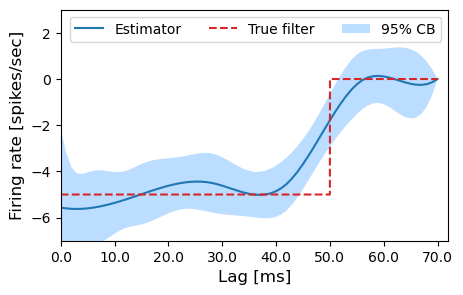

In [6]:
jittertool = jitter.JitterTool()
model_par = {'filter_type': 'bspline', 'num_knots': 6, 'knot_space_par': 20, 'filter_length': 0.07, 'num_tail_drop': 1,
             'append_nuisance': ['const', 'gaussian_kernel'], 'kernel_width': 0.045,
             'const_offset': 0, 'learning_rate': 0.9, 'max_num_itrs': 100, 'epsilon': 1e-5}
model_par_hat = jittertool.bivariate_continuous_time_coupling_filter_regression(
    spike_times_x, spike_times_y, [0,trial_length], model_par)

jittertool.pulication_plot_continuous_time_bivariate_regression_model_par(model_par_hat, generator_par, xlim=[0,0.072], ylim=[-7,3])

### Square window fitting.

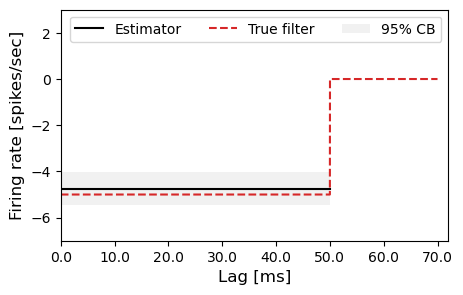

In [7]:
jittertool = jitter.JitterTool()
model_par = {'filter_type': 'square', 'filter_length': 0.05,
             'append_nuisance': ['const', 'gaussian_kernel'], 'kernel_width': 0.045,
             'const_offset': 0, 'learning_rate': 0.5, 'max_num_itrs': 1000, 'epsilon': 1e-6}

model_par_hat = jittertool.bivariate_continuous_time_coupling_filter_regression(
    spike_times_x, spike_times_y, [0,trial_length], model_par)

jittertool.pulication_plot_continuous_time_bivariate_regression_model_par(model_par_hat, generator_par, xlim=[0,0.072], ylim=[-7,3])